In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\acer\Desktop\UPGRAD\machine learning\churn_data.csv")
df1=pd.read_csv(r"C:\Users\acer\Desktop\UPGRAD\machine learning\customer_data.csv")
df2=pd.read_csv(r"C:\Users\acer\Desktop\UPGRAD\machine learning\internet_data.csv")

In [3]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
df2.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
# merging the data on column_id
df3=pd.merge(df,df1,how='inner',on='customerID')
telecom=pd.merge(df2,df3,how='inner',on='customerID')

In [7]:
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,1,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,34,...,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,2,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,2,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [8]:
df.shape

(7043, 9)

In [9]:
df1.shape

(7043, 5)

In [10]:
df2.shape

(7043, 9)

In [11]:
telecom.shape

(7043, 21)

In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   MultipleLines     7043 non-null   object 
 2   InternetService   7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   StreamingTV       7043 non-null   object 
 8   StreamingMovies   7043 non-null   object 
 9   tenure            7043 non-null   int64  
 10  PhoneService      7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   object 
 16  Churn             7043 non-null   object 


In [13]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


# Step 3: Data preparation
convert to binary Y/N to 1/0

In [14]:
def binary(x):
    return x.map({'Yes':1,'No':0})
lis=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
telecom[lis]=telecom[lis].apply(binary)

In [15]:
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,1,...,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,34,...,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,2,...,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,2,...,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0


In [16]:
telecom.columns

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'tenure', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [17]:
telecom['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

For categorical vars create dummies

In [18]:
dummy1=pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
telecom=pd.concat([telecom,dummy1],axis=1)

In [19]:
m1=pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
m11=m1.drop(['MultipleLines_No phone service'],1)
telecom=pd.concat([telecom,m11],axis=1)

m1=pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
m11=m1.drop(['OnlineSecurity_No internet service'],1)
telecom=pd.concat([telecom,m11],axis=1)

m1=pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
m11=m1.drop(['OnlineBackup_No internet service'],1)
telecom=pd.concat([telecom,m11],axis=1)

m1=pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
m11=m1.drop(['DeviceProtection_No internet service'],1)
telecom=pd.concat([telecom,m11],axis=1)

m1=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
m11=m1.drop(['TechSupport_No internet service'],1)
telecom=pd.concat([telecom,m11],axis=1)

In [20]:
m1=pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
m11=m1.drop(['StreamingTV_No internet service'],1)
telecom=pd.concat([telecom,m11],axis=1)

m1=pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
m11=m1.drop(['StreamingMovies_No internet service'],1)
telecom=pd.concat([telecom,m11],axis=1)

In [21]:
telecom.columns

Index(['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'tenure', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [22]:
telecom.drop(columns=['Contract','PaymentMethod','gender','MultipleLines','InternetService','TechSupport','StreamingMovies','StreamingTV'],axis=1,inplace=True)


In [23]:
telecom=telecom[telecom['TotalCharges']!=" "]

In [24]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'])

In [25]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   OnlineSecurity                         7032 non-null   object 
 2   OnlineBackup                           7032 non-null   object 
 3   DeviceProtection                       7032 non-null   object 
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  SeniorCitizen                          7032 non-null   int64  
 11  Part

In [26]:
telecom['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [27]:
# Check for outliers
num=telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [28]:
num.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


In [29]:
# Adding up the missing values
telecom.isnull().sum()

customerID                               0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecur

In [30]:
telecom.drop(columns=['OnlineSecurity','OnlineBackup','DeviceProtection'],axis=1,inplace=True)

# Step4: Test-train split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X=telecom.drop(columns=['Churn','customerID'],axis=1)
y=telecom['Churn']
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [33]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

# Step5: Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
3946,-0.952316,0,0,-0.202600,-0.767315,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,1
3394,-0.262207,1,0,-0.101327,-0.306559,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1635,-1.195884,1,1,0.177587,-0.908535,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,1
4088,-1.033505,1,0,0.298782,-0.776092,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1886,1.402172,1,1,-0.139512,0.742090,0,1,1,0,1,...,1,0,0,1,0,1,1,0,1,0


In [37]:
churn =(sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

# Step6: looking at correlations

In [38]:
X_train.corr()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
tenure,1.000000,0.010203,-0.004555,0.240537,0.823503,0.007592,0.387856,0.170036,0.204577,0.565296,...,-0.310426,0.356401,-0.306741,0.353825,-0.265127,0.327256,-0.245246,0.279291,-0.250772,0.283738
PhoneService,0.010203,1.000000,0.013363,0.245966,0.113360,0.006960,0.026247,0.000092,-0.009228,0.004030,...,-0.095376,-0.053096,-0.065212,-0.084614,-0.065768,-0.087390,-0.123037,-0.025457,-0.108151,-0.040545
PaperlessBilling,-0.004555,0.013363,1.000000,0.344734,0.150420,0.154523,-0.025455,-0.114979,-0.052707,-0.146703,...,0.148584,0.119370,0.159048,0.108602,0.229957,0.034193,0.045610,0.222293,0.058454,0.209062
MonthlyCharges,0.240537,0.245966,0.344734,1.000000,0.647783,0.215182,0.084410,-0.116330,0.002729,-0.076191,...,0.215500,0.441187,0.181036,0.478082,0.327872,0.337157,0.022706,0.628474,0.023412,0.626482
TotalCharges,0.823503,0.113360,0.150420,0.647783,1.000000,0.092039,0.314630,0.064400,0.173128,0.360977,...,-0.173881,0.508779,-0.177366,0.513939,-0.083567,0.436255,-0.195081,0.517067,-0.202111,0.522614
SeniorCitizen,0.007592,0.006960,0.154523,0.215182,0.092039,1.000000,0.018363,-0.207667,-0.047796,-0.119638,...,0.087056,0.065378,0.094732,0.057444,0.200718,-0.057424,0.039704,0.112735,0.035841,0.116440
Partner,0.387856,0.026247,-0.025455,0.084410,0.314630,0.018363,1.000000,0.455552,0.071645,0.264450,...,-0.143118,0.136339,-0.143083,0.136815,-0.112592,0.110897,-0.120458,0.108802,-0.124382,0.112257
Dependents,0.170036,0.000092,-0.114979,-0.116330,0.064400,-0.207667,0.455552,1.000000,0.064548,0.212790,...,-0.137395,0.024157,-0.125278,0.011723,-0.165201,0.057340,-0.095509,-0.020261,-0.072434,-0.043498
Contract_One year,0.204577,-0.009228,-0.052707,0.002729,0.173128,-0.047796,0.071645,0.064548,1.000000,-0.292585,...,-0.119283,0.089447,-0.136257,0.107526,-0.120846,0.096786,-0.102386,0.069004,-0.095832,0.062095
Contract_Two year,0.565296,0.004030,-0.146703,-0.076191,0.360977,-0.119638,0.264450,0.212790,-0.292585,1.000000,...,-0.289266,0.111221,-0.334388,0.158917,-0.396987,0.238238,-0.256851,0.072467,-0.258938,0.073887


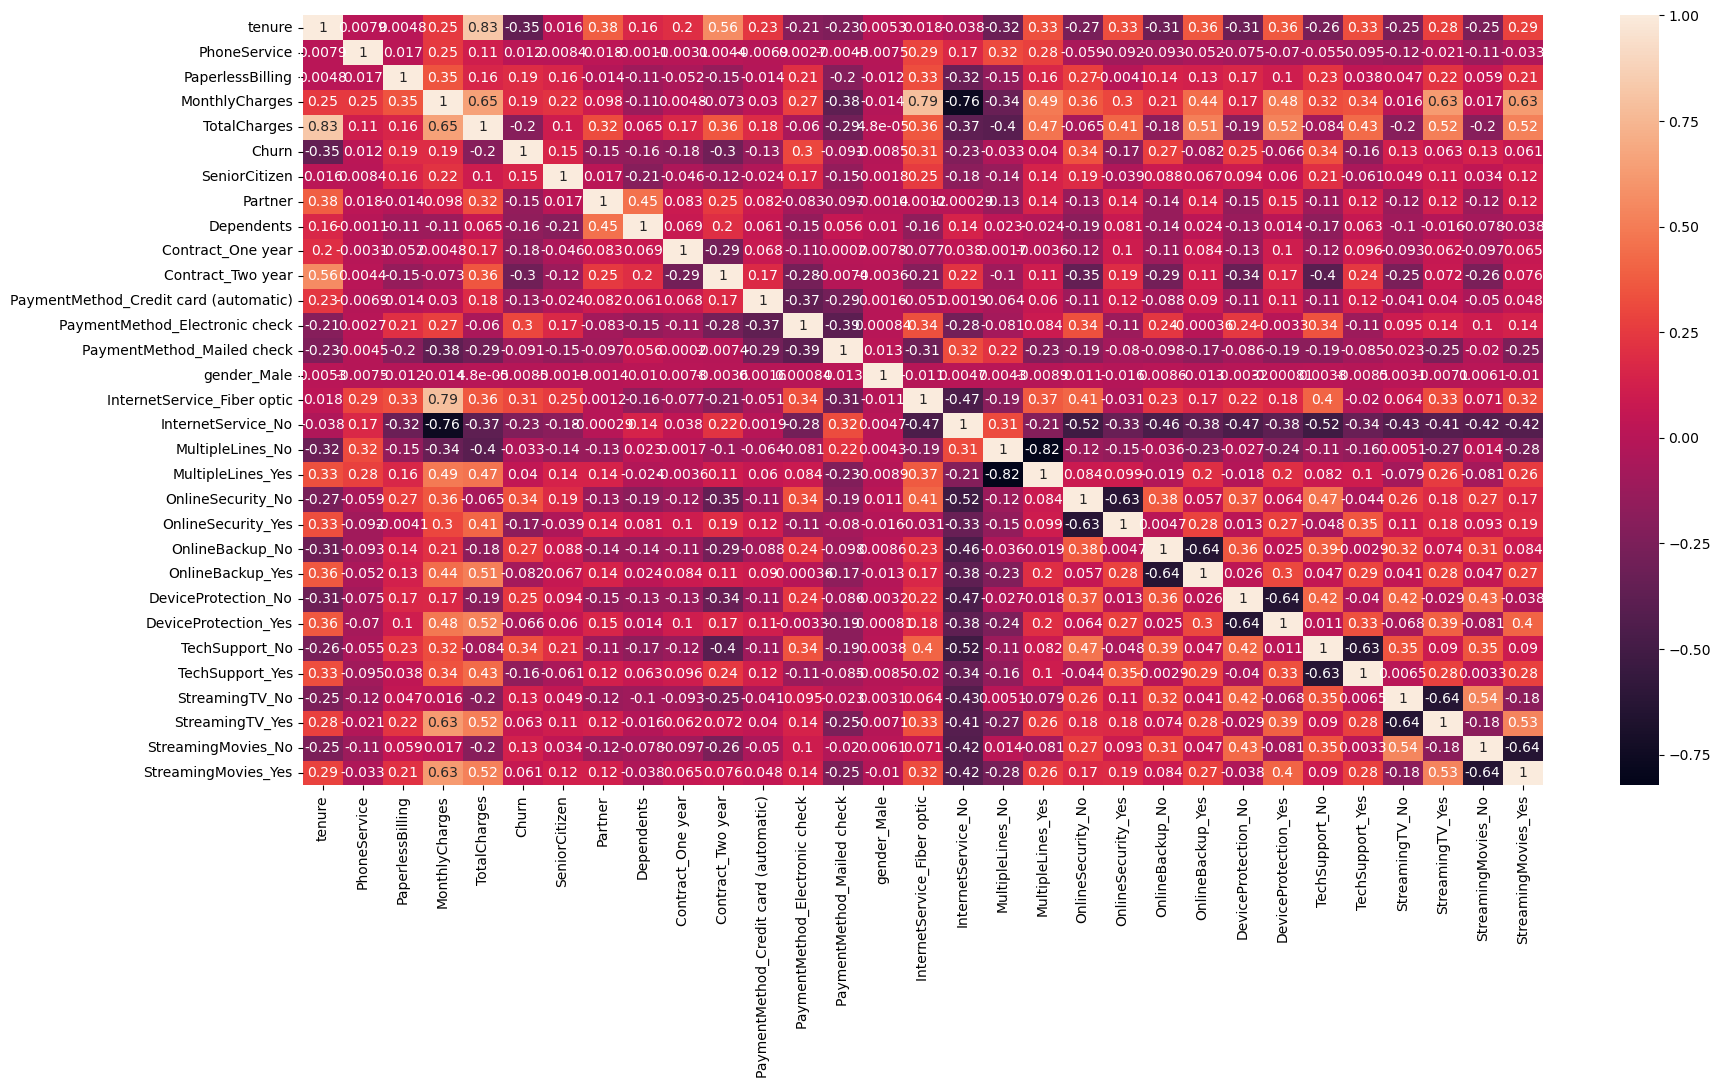

In [39]:
# correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

Dropping highly correlated dummy variables

In [40]:
X_test=X_test.drop(columns=['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

In [41]:
X_train=X_train.drop(columns=['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

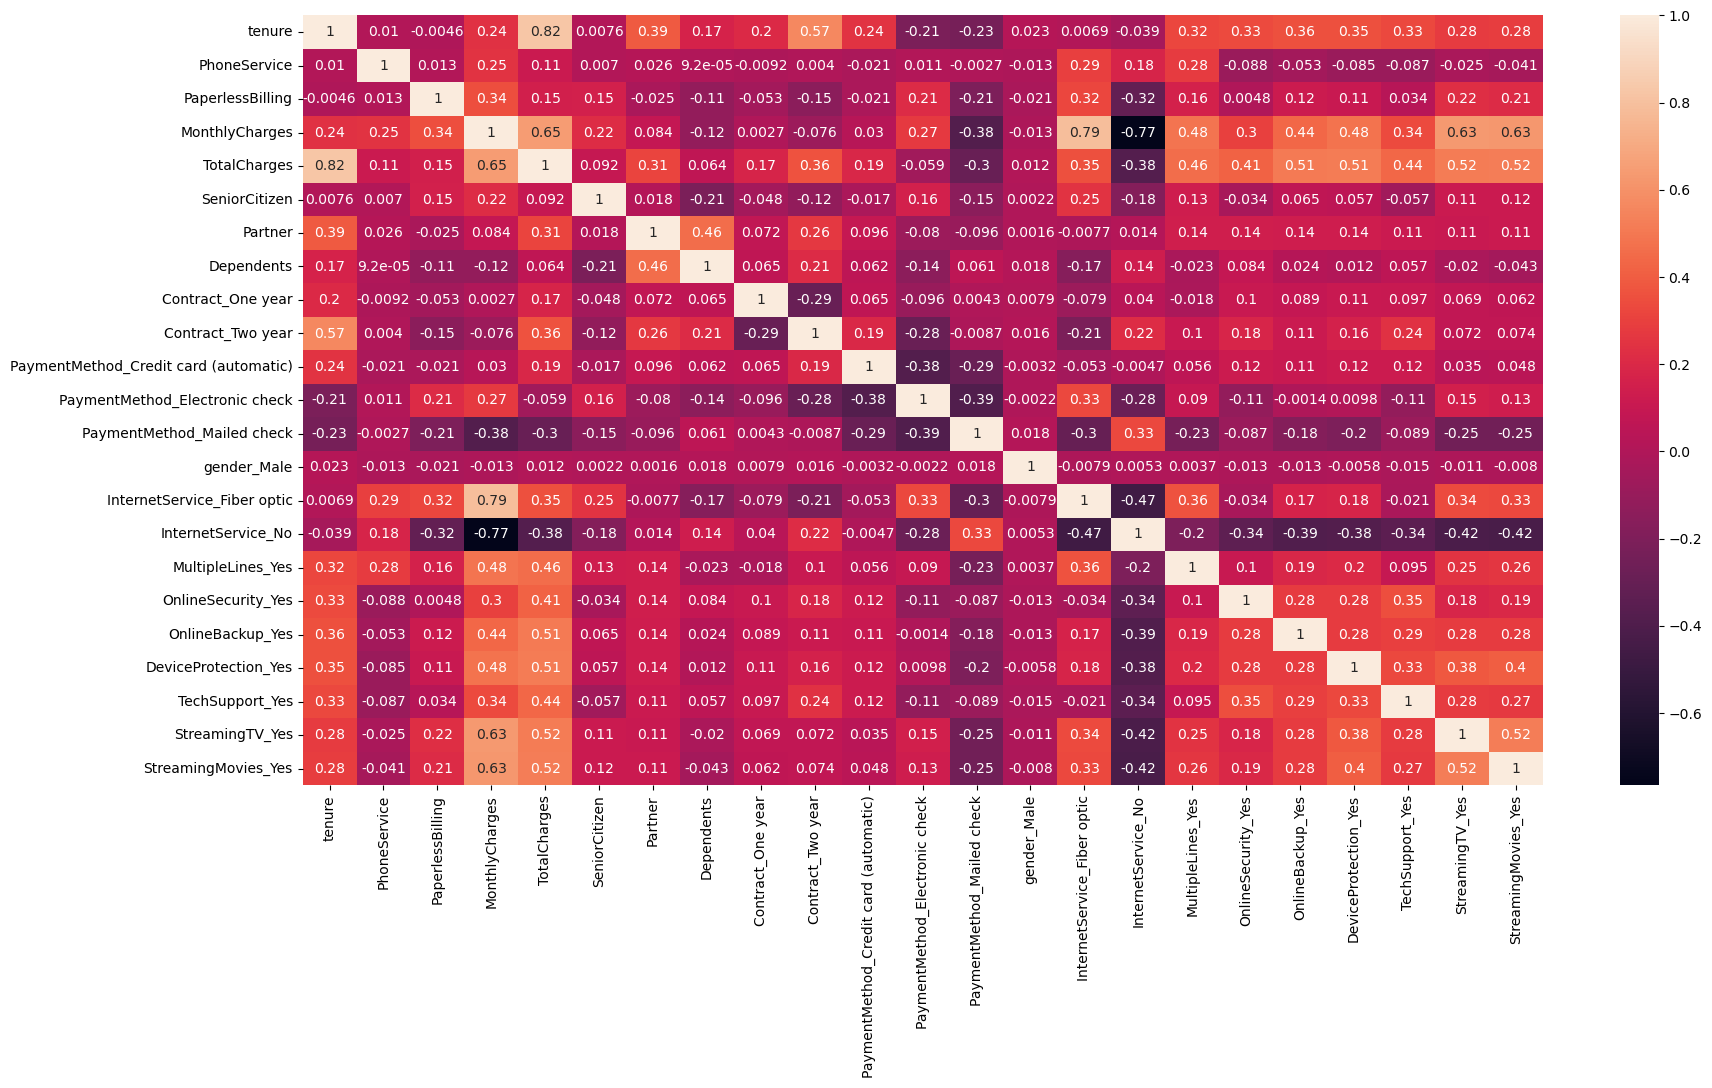

In [42]:
#Check correlation again
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

Running your 1st model

In [43]:
import statsmodels.api as sm

In [44]:
X_train.dtypes

tenure                                   float64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Contract_One year                          uint8
Contract_Two year                          uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
gender_Male                                uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
MultipleLines_Yes                          uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_Yes                           uint8
DeviceProtection_Yes                       uint8
TechSupport_Yes     

In [45]:
y_train.dtypes

dtype('int64')

In [46]:
print(X_train.index)
print(y_train.index)

Int64Index([3946, 3394, 1635, 4088, 1886, 5149, 1617,  981, 3080, 4992,
            ...
            5343,  466, 6274, 5743, 3097, 3778, 5199, 5235, 5399,  862],
           dtype='int64', length=4922)
Int64Index([3946, 3394, 1635, 4088, 1886, 5149, 1617,  981, 3080, 4992,
            ...
            5343,  466, 6274, 5743, 3097, 3778, 5199, 5235, 5399,  862],
           dtype='int64', length=4922)


In [47]:
#y_train.drop(columns=['OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No', 'StreamingMovies_No','MultipleLines_No'],inplace=True)

In [48]:
X_train.shape

(4922, 23)

In [49]:
y_train.shape

(4922,)

In [50]:
#y_train['tenure']=y_train['tenure'].astype('float64')

In [51]:
y_train.dtypes

dtype('int64')

In [52]:
X_train_constant=sm.add_constant(X_train)
X_train_constant.head()

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
3946,1.0,-0.952316,0,0,-0.202600,-0.767315,0,0,0,0,...,0,0,0,0,1,0,1,1,1,1
3394,1.0,-0.262207,1,0,-0.101327,-0.306559,0,0,0,1,...,1,0,0,1,1,1,0,0,0,0
1635,1.0,-1.195884,1,1,0.177587,-0.908535,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
4088,1.0,-1.033505,1,0,0.298782,-0.776092,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1886,1.0,1.402172,1,1,-0.139512,0.742090,0,1,1,0,...,1,0,0,0,1,0,1,1,0,0


In [53]:
print(X_train_constant.index)
print(y_train.index)

Int64Index([3946, 3394, 1635, 4088, 1886, 5149, 1617,  981, 3080, 4992,
            ...
            5343,  466, 6274, 5743, 3097, 3778, 5199, 5235, 5399,  862],
           dtype='int64', length=4922)
Int64Index([3946, 3394, 1635, 4088, 1886, 5149, 1617,  981, 3080, 4992,
            ...
            5343,  466, 6274, 5743, 3097, 3778, 5199, 5235, 5399,  862],
           dtype='int64', length=4922)


In [54]:
logml = sm.GLM(y_train,X_train_constant,family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.1
Date:                Thu, 11 Apr 2024   Deviance:                       4042.2
Time:                        00:06:07   Pearson chi2:                 5.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2859
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2320      1.533     -2.108      0.035      -6.237      -0.227
tenure                                   -1.5221      0.187     -8.128      0.000      -1.889      -1.155
PhoneService                              0.5535      0.785      0.705      0.481      -0.984       2.091
PaperlessBilling                          0.2066      0.089      2.327      0.020       0.033       0.381
MonthlyCharges                           -1.6782      1.157     -1.450      0.147      -3.946       0.590
TotalCharges                              0.7688      0.194      3.956      0.000       0.388       1.150
SeniorCitizen                             0.2268      0.101      2.235      0.025       0.028       0.426
Partner                                   0.1332      0.094      1.420      0.155      -0.051       0.317
Dependents                               -0.2451      0.109     -2.240      0.025      -0.460      -0.031
Contract_One year                        -0.8185      0.133     -6.177      0.000      -1.078      -0.559
Contract_Two year                        -1.4284      0.209     -6.823      0.000      -1.839      -1.018
PaymentMethod_Credit card (automatic)    -0.1625      0.137     -1.186      0.236      -0.431       0.106
PaymentMethod_Electronic check            0.2029      0.113      1.790      0.073      -0.019       0.425
PaymentMethod_Mailed check               -0.1224      0.138     -0.886      0.376      -0.393       0.148
gender_Male                              -0.0202      0.078     -0.259      0.796      -0.173       0.133
InternetService_Fiber optic               2.1963      0.965      2.275      0.023       0.304       4.088
InternetService_No                       -2.1515      0.976     -2.204      0.028      -4.065      -0.238
MultipleLines_Yes                         0.4650      0.214      2.173      0.030       0.046       0.884
OnlineSecurity_Yes                       -0.1314      0.215     -0.610      0.542      -0.553       0.291
OnlineBackup_Yes                          0.1700      0.212      0.803      0.422      -0.245       0.585
DeviceProtection_Yes                      0.2282      0.212      1.078      0.281      -0.187       0.643
TechSupport_Yes                          -0.1000      0.218     -0.459      0.647      -0.527       0.327
StreamingTV_Yes                           0.7632      0.393      1.942      0.052      -0.007       1.534
StreamingMovies_Yes                       0.7661      0.396      1.936      0.053      -0.010       1.542
=========================================================================================================
"""

# Step 8: feature selection using RFE

In [55]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [56]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [57]:
rfe.support_

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True])

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', False, 2),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 4),
 ('Dependents', False, 3),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 5),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 6),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 7),
 ('DeviceProtection_Yes', False, 8),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [59]:
col=X_train.columns[rfe.support_]

In [60]:
col

Index(['tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

Accessing the model with statsmodels

In [62]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.2
Date:                Thu, 11 Apr 2024   Deviance:                       4056.4
Time:                        00:06:07   Pearson chi2:                 5.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2838
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8268      0.480     -3.804      0.000      -2.768      -0.886
tenure                            -1.4979      0.184     -8.155      0.000      -1.858      -1.138
PhoneService                      -0.1672      0.291     -0.574      0.566      -0.738       0.404
MonthlyCharges                    -0.6283      0.384     -1.635      0.102      -1.382       0.125
TotalCharges                       0.7720      0.193      4.009      0.000       0.395       1.149
SeniorCitizen                      0.2839      0.099      2.858      0.004       0.089       0.479
Contract_One year                 -0.8449      0.132     -6.415      0.000      -1.103      -0.587
Contract_Two year                 -1.4683      0.208     -7.062      0.000      -1.876      -1.061
PaymentMethod_Electronic check     0.3137      0.083      3.796      0.000       0.152       0.476
InternetService_Fiber optic        1.3730      0.334      4.105      0.000       0.717       2.029
InternetService_No                -1.3312      0.379     -3.511      0.000      -2.074      -0.588
MultipleLines_Yes                  0.3079      0.114      2.707      0.007       0.085       0.531
OnlineSecurity_Yes                -0.3116      0.119     -2.618      0.009      -0.545      -0.078
TechSupport_Yes                   -0.2705      0.124     -2.190      0.029      -0.513      -0.028
StreamingTV_Yes                    0.4347      0.161      2.706      0.007       0.120       0.750
StreamingMovies_Yes                0.4352      0.162      2.690      0.007       0.118       0.752
==================================================================================================
"""

In [63]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

3946    0.359484
3394    0.090383
1635    0.336972
4088    0.681785
1886    0.004135
5149    0.002386
1617    0.193119
981     0.008053
3080    0.525644
4992    0.076711
dtype: float64

In [64]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35948418, 0.09038256, 0.33697232, 0.68178506, 0.00413488,
       0.00238628, 0.19311948, 0.0080528 , 0.52564397, 0.07671104])

In [65]:
y_train_pred_final= pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,1,0.359484,3946
1,0,0.090383,3394
2,0,0.336972,1635
3,1,0.681785,4088
4,0,0.004135,1886


In [66]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,1,0.359484,3946,0
1,0,0.090383,3394,0
2,0,0.336972,1635,0
3,1,0.681785,4088,1
4,0,0.004135,1886,0


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [68]:
# confusion matrix
# Convert continuous variable to binary
#y_train_pred_final['predicted_binary'] = (y_train_pred_final.predicted > 0.5).astype(float)
#y_train_pred_final.drop('predicted_binary',axis=1,inplace=True)
# Then, you can calculate the confusion matrix
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3221  393]
 [ 574  734]]


In [69]:
# Lest's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8035351483136937


In [70]:
# check Vifs
# define function to display vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
def VIF(x):
    v=pd.DataFrame()
    v['features']=x.columns
    v['vif']=[vif(x.values,i) for i in range(x.shape[1])]
    v['vif']=round(v['vif'],2)
    v=v.sort_values(by='vif',ascending=False)
    return v

In [71]:
VIF(X_train[col])

,features,vif
2,MonthlyCharges,13.17
3,TotalCharges,10.17
1,PhoneService,8.21
0,tenure,6.92
8,InternetService_Fiber optic,6.37
9,InternetService_No,6.12
6,Contract_Two year,3.43
13,StreamingTV_Yes,2.78
14,StreamingMovies_Yes,2.73
10,MultipleLines_Yes,2.53


In [72]:
col=col.drop('MonthlyCharges')

In [73]:
VIF(X_train[col])

,features,vif
1,PhoneService,8.19
2,TotalCharges,7.55
0,tenure,6.61
7,InternetService_Fiber optic,3.98
5,Contract_Two year,3.32
8,InternetService_No,3.29
12,StreamingTV_Yes,2.62
13,StreamingMovies_Yes,2.60
9,MultipleLines_Yes,2.45
11,TechSupport_Yes,2.03


In [74]:
X_train_sm= sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.5
Date:                Thu, 11 Apr 2024   Deviance:                       4059.0
Time:                        00:06:07   Pearson chi2:                 5.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2834
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [75]:
VIF(X_train[col])

,features,vif
1,PhoneService,8.19
2,TotalCharges,7.55
0,tenure,6.61
7,InternetService_Fiber optic,3.98
5,Contract_Two year,3.32
8,InternetService_No,3.29
12,StreamingTV_Yes,2.62
13,StreamingMovies_Yes,2.60
9,MultipleLines_Yes,2.45
11,TechSupport_Yes,2.03


In [76]:
col=col.drop('PhoneService')

In [77]:
X_train_sm= sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.9
Date:                Thu, 11 Apr 2024   Deviance:                       4071.7
Time:                        00:06:08   Pearson chi2:                 5.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2816
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [78]:
VIF(X_train[col])

,features,vif
1,TotalCharges,7.43
0,tenure,6.53
4,Contract_Two year,3.18
6,InternetService_Fiber optic,2.90
11,StreamingTV_Yes,2.59
12,StreamingMovies_Yes,2.58
7,InternetService_No,2.38
8,MultipleLines_Yes,2.20
10,TechSupport_Yes,1.91
3,Contract_One year,1.85


In [79]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [80]:
y_train_pred[:10]

array([0.27689948, 0.10697911, 0.39290202, 0.65858925, 0.00538726,
       0.00304832, 0.21975663, 0.00926254, 0.4042515 , 0.0645614 ])

In [81]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [82]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,Churn_Prob
0,1,0.359484,3946,0,0.276899
1,0,0.090383,3394,0,0.106979
2,0,0.336972,1635,0,0.392902
3,1,0.681785,4088,1,0.658589
4,0,0.004135,1886,0,0.005387


In [83]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8015034538805363


In [84]:
col=col.drop('TotalCharges')

In [85]:
X_train_sm= sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.1
Date:                Thu, 11 Apr 2024   Deviance:                       4082.2
Time:                        00:06:08   Pearson chi2:                 4.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2801
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5513      0.116    -13.375      0.000      -1.779      -1.324
tenure                            -0.8288      0.065    -12.706      0.000      -0.957      -0.701
SeniorCitizen                      0.2992      0.100      3.004      0.003       0.104       0.494
Contract_One year                 -0.8586      0.130     -6.596      0.000      -1.114      -0.603
Contract_Two year                 -1.4457      0.205     -7.038      0.000      -1.848      -1.043
PaymentMethod_Electronic check     0.3120      0.083      3.775      0.000       0.150       0.474
InternetService_Fiber optic        0.8714      0.097      8.999      0.000       0.682       1.061
InternetService_No                -0.9442      0.151     -6.233      0.000      -1.241      -0.647
MultipleLines_Yes                  0.2056      0.091      2.249      0.025       0.026       0.385
OnlineSecurity_Yes                -0.3967      0.101     -3.935      0.000      -0.594      -0.199
TechSupport_Yes                   -0.3503      0.102     -3.438      0.001      -0.550      -0.151
StreamingTV_Yes                    0.3127      0.094      3.334      0.001       0.129       0.496
StreamingMovies_Yes                0.3287      0.093      3.517      0.000       0.146       0.512
==================================================================================================
"""

In [86]:
VIF(X_train[col])

,features,vif
3,Contract_Two year,3.06
5,InternetService_Fiber optic,2.61
10,StreamingTV_Yes,2.52
11,StreamingMovies_Yes,2.50
7,MultipleLines_Yes,2.17
6,InternetService_No,1.95
9,TechSupport_Yes,1.89
0,tenure,1.88
2,Contract_One year,1.83
4,PaymentMethod_Electronic check,1.76


In [87]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [88]:
y_train_pred[:10]

array([0.295746  , 0.11187601, 0.385709  , 0.66690916, 0.00734705,
       0.0071384 , 0.23140893, 0.01484796, 0.37132182, 0.10200816])

In [89]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [90]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,Churn_Prob
0,1,0.359484,3946,0,0.295746
1,0,0.090383,3394,0,0.111876
2,0,0.336972,1635,0,0.385709
3,1,0.681785,4088,1,0.666909
4,0,0.004135,1886,0,0.007347


In [91]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8027224705404307


# Metrics beyond simple accuracy

In [92]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

In [93]:
# let's see sensitivity
TP/float(TP+FN)

0.5611620795107034

In [94]:
# specificity
TN/float(TN+FP)

0.8912562257885999

In [95]:
# false positive rate
print(FP/float(FP+TN))

0.10874377421140011


In [96]:
# Positve predictive value
print(TP/float(TP+FP))

0.6512866015971606


In [97]:
# Negativepredictive value
print(TN/float(TN+FN))

0.8487483530961791


In [98]:
df2=y_train_pred_final[['CustID','Churn','Churn_Prob']]

In [99]:
df2.to_excel('Churnxl.xlsx',index=False)

# Step 9: Plotting the Curve

An Roc curve demonstrates several things 
- it shows the tradeoff between sensitivity and specificity
- The closure, the curve follows the left hand border and then the top border of the ROC space, the more accurate the test.
- The closure the curve comes to the 45 degree  diagonal of the ROC space, the less accurate the test.

In [100]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label=auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1,0])
    plt.ylim([0.0,1.05])
    plt.legend(loc='Lower Right')
    plt.show()
    
    return None

In [101]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

ValueError: too many values to unpack (expected 2)

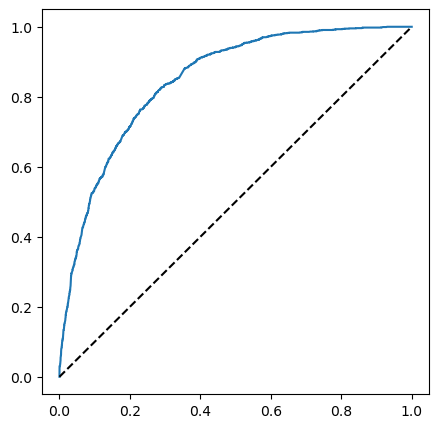

In [102]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

Finding Optimal Threshold

In [103]:
# let's create columns with diff probability cut-offs
numbers=[ float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>i else 0)

y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.359484,3946,0,0.295746,1,1,1,0,0,0,0,0,0,0
1,0,0.090383,3394,0,0.111876,1,1,0,0,0,0,0,0,0,0
2,0,0.336972,1635,0,0.385709,1,1,1,1,0,0,0,0,0,0
3,1,0.681785,4088,1,0.666909,1,1,1,1,1,1,1,0,0,0
4,0,0.004135,1886,0,0.007347,1,0,0,0,0,0,0,0,0,0


In [104]:
# now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

#TP=Con[1,1] FP= Con[1,0] FN=Con[0,1] TN=Con[0,0]
num=[float(i/10) for i in range(10)]
for i in num:
    cml=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total=sum(sum(cml))
    accuracy= (cml[0,0]+cml[1,1])/total
    sensi= cml[1,1]/(cml[1,1]+cml[1,0])
    speci= cml[0,0]/(cml[0,0]+cml[0,1])
    cutoff_df.loc[i]=[i, accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.265746  1.000000  0.000000
0.1   0.1  0.617229  0.942661  0.499447
0.2   0.2  0.718610  0.850153  0.671002
0.3   0.3  0.764933  0.764526  0.765080
0.4   0.4  0.791142  0.658257  0.839236
0.5   0.5  0.802722  0.547401  0.895130
0.6   0.6  0.795815  0.397554  0.939956
0.7   0.7  0.771434  0.204128  0.976757
0.8   0.8  0.742178  0.035168  0.998063
0.9   0.9  0.734254  0.000000  1.000000


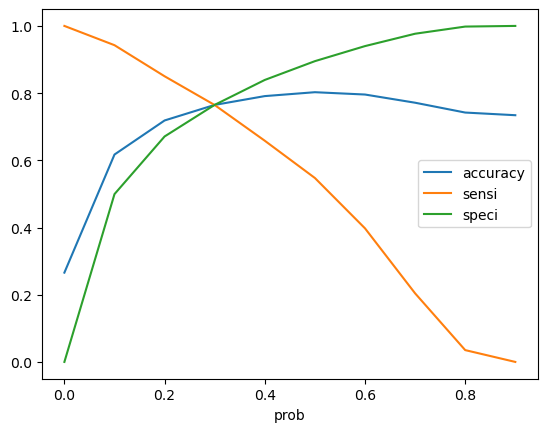

In [105]:
# let's plot accuracy sensi speci for various probabilities
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [106]:
y_train_pred_final['final_pred']=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
0,1,0.359484,3946,0,0.295746,1,1,1,0,0,0,0,0,0,0,0
1,0,0.090383,3394,0,0.111876,1,1,0,0,0,0,0,0,0,0,0
2,0,0.336972,1635,0,0.385709,1,1,1,1,0,0,0,0,0,0,1
3,1,0.681785,4088,1,0.666909,1,1,1,1,1,1,1,0,0,0,1
4,0,0.004135,1886,0,0.007347,1,0,0,0,0,0,0,0,0,0,0


In [107]:
# now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

#TP=Con[1,1] FP= Con[1,0] FN=Con[0,1] TN=Con[0,0]
num=[float(i/10) for i in range(10)]
for i in num:
    cml=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total=sum(sum(cml))
    accuracy= (cml[0,0]+cml[1,1])/total
    sensi= cml[1,1]/(cml[1,1]+cml[1,0])
    speci= cml[0,0]/(cml[0,0]+cml[0,1])
    cutoff_df.loc[i]=[i, accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.265746  1.000000  0.000000
0.1   0.1  0.617229  0.942661  0.499447
0.2   0.2  0.718610  0.850153  0.671002
0.3   0.3  0.764933  0.764526  0.765080
0.4   0.4  0.791142  0.658257  0.839236
0.5   0.5  0.802722  0.547401  0.895130
0.6   0.6  0.795815  0.397554  0.939956
0.7   0.7  0.771434  0.204128  0.976757
0.8   0.8  0.742178  0.035168  0.998063
0.9   0.9  0.734254  0.000000  1.000000


In [108]:
metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.final_pred)

array([[2765,  849],
       [ 308, 1000]], dtype=int64)

# Precision and Recall

In [109]:
# confusion matrix
confusion= metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3235,  379],
       [ 592,  716]], dtype=int64)

In [110]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6538812785388128

In [111]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5474006116207951

In [113]:
from sklearn.metrics import precision_score, recall_score

In [114]:
# Precision score
precision_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.6538812785388128

In [115]:
# Recall score
recall_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.5474006116207951

In [116]:
from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       0
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    1
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 4917    0
 4918    0
 4919    1
 4920    0
 4921    1
 Name: predicted, Length: 4922, dtype: int64)

In [121]:
p, r, thresholds=precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

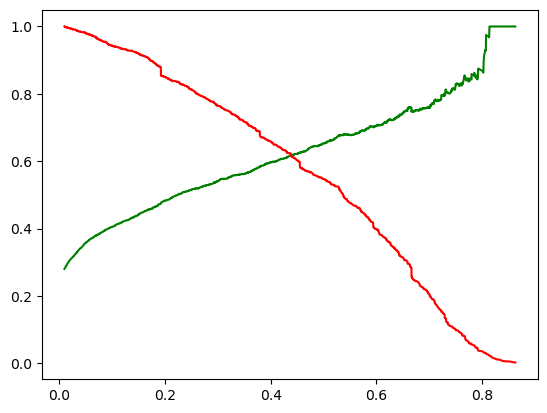

In [122]:
plt.plot(thresholds, p[:-1],'g-')
plt.plot(thresholds, r[:-1],'r-')
plt.show()

# Making predictions on test set

In [124]:
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [125]:
X_test=X_test[col]
X_test.head()

,tenure,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
2481,1.158605,1,0,1,0,0,1,1,0,0,0,0
6784,-0.546370,0,0,0,0,0,1,1,0,0,0,0
6125,-0.789938,0,0,0,0,1,0,1,0,0,1,1
3052,0.184334,0,0,0,0,0,0,1,1,0,0,0
4099,-1.074100,0,0,0,0,0,0,0,1,0,0,0


In [126]:
X_test_sm=sm.add_constant(X_test)

In [127]:
y_test_pred=res.predict(X_test_sm)

In [128]:
# convert y_test to dataframe
y_pred_1=pd.DataFrame(y_test_pred)

In [129]:
y_pred_1.head()

,0
2481,0.012168
6784,0.137387
6125,0.694607
3052,0.130651
4099,0.257729


In [130]:
y_test_df=pd.DataFrame(y_test)

In [131]:
y_test_df['CustID']=y_test_df.index

In [132]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [133]:
y_pred_final= pd.concat([y_test_df,y_pred_1],axis=1)

In [134]:
y_pred_final.head()

,Churn,CustID,0
0,0,2481,0.012168
1,0,6784,0.137387
2,1,6125,0.694607
3,0,3052,0.130651
4,0,4099,0.257729


In [135]:
y_pred_final=y_pred_final.rename(columns={0:'Churn_Prob'})

In [137]:
y_pred_final= y_pred_final.reindex(['CustID','Churn','Churn_Prob'],axis=1)

In [138]:
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,2481,0,0.012168
1,6784,0,0.137387
2,6125,1,0.694607
3,3052,0,0.130651
4,4099,0,0.257729


In [139]:
y_pred_final['final_predicted']= y_pred_final.Churn_Prob.map(lambda x: 1 if x>0.3 else 0)

In [140]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,2481,0,0.012168,0
1,6784,0,0.137387,0
2,6125,1,0.694607,1
3,3052,0,0.130651,0
4,4099,0,0.257729,0


In [141]:
# accuracy score for test set
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.final_predicted)

0.7578199052132701

In [142]:
# confusion matrix for test set
confusion2=metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted)
confusion2

array([[1171,  378],
       [ 133,  428]], dtype=int64)

In [143]:
TP=confusion2[1,1]
FP=confusion2[0,1]
TN=confusion2[0,0]
FN=confusion2[1,0]

In [144]:
#sensitivity
TP/float(TP+FN)

0.7629233511586453

In [145]:
#specificity
TN/float(TN+FP)

0.7559715945771466